In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import timedelta
from urllib.request import urlopen
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:

data=pd.read_csv("covid_19_clean_complete.csv")
fg = pd.read_csv('full_grouped.csv')
fg['Date'] = pd.to_datetime(fg['Date'])
cw = pd.read_csv('country_wise_latest.csv')
cw = cw.replace('', np.nan).fillna(0)
wd = pd.read_csv('worldometer_data.csv')
wd = wd.replace('', np.nan).fillna(0)

In [3]:
fg.tail(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35146,2020-07-27,United Kingdom,301708,45844,1437,254427,688,7,3,Europe
35147,2020-07-27,Uruguay,1202,35,951,216,10,1,3,Americas
35148,2020-07-27,Uzbekistan,21209,121,11674,9414,678,5,569,Europe
35149,2020-07-27,Venezuela,15988,146,9959,5883,525,4,213,Americas
35150,2020-07-27,Vietnam,431,0,365,66,11,0,0,Western Pacific
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [4]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)

    fig.show()

In [5]:
fig = px.choropleth(fg, locations="Country/Region", 
                    color=fg["New cases"],
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=fg["Date"].dt.strftime('%Y-%m-%d')
                    ,
                    title='Zaman içinde vakalar', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [6]:
cw.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [7]:
cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
cw.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [10]:
cw2=cw.sort_values(by=['1 week change'],ascending=False)

In [11]:
cw2.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia


Text(0.5, 1.0, 'haftalık en çok vaka oranı artan 10 ülke')

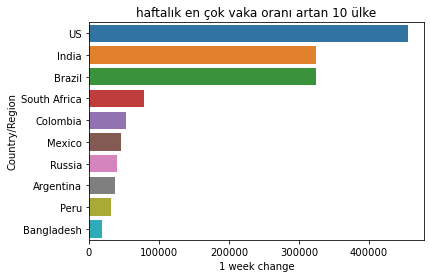

In [12]:
sns.barplot(y = cw2["Country/Region"][:10], x = cw2["1 week change"][:10])
plt.title("haftalık en çok vaka oranı artan 10 ülke")

In [4]:
cw=cw.rename(columns={"Country/Region":"Country"})

In [14]:
df_turkiye = cw[cw["Country"]=="Turkey"]

In [10]:
df_turkiye

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
172,Turkey,227019,5630,210469,10920,919,17,982,2.48,92.71,2.67,220572,6447,2.92,Europe


In [11]:
df_death=cw.sort_values(by=['Deaths'],ascending=False)

Text(0.5, 1.0, 'En çok ölüm yaşanan 10 ülke')

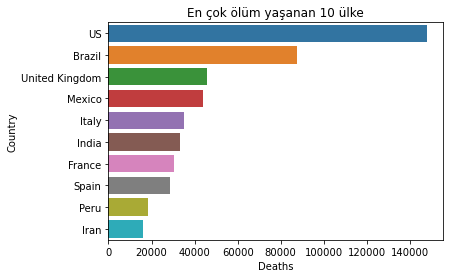

In [12]:
sns.barplot(y = df_death["Country"][:10], x = df_death["Deaths"][:10])
plt.title("En çok ölüm yaşanan 10 ülke")

In [13]:
cw.head(10)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [14]:
cw.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [15]:
cw['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

## AŞAĞIDAKİ DATA SQL İLE OLUŞTURULDU
- SELECT who_region,SUM(deaths)  FROM covid 
- GROUP BY who_region;


In [16]:
df_reg=pd.read_csv('grup_olum.csv')
df_reg=df_reg.sort_values(by=["ölümler"],ascending=False)

In [17]:
df_reg

,who_region,ölümler
2,Americas,342732
0,Europe,211144
5,South-East Asia,41349
3,Eastern Mediterranean,38339
4,Africa,12223
1,Western Pacific,8249


Text(0.5, 1.0, 'Kıtalara göre toplam ölümler')

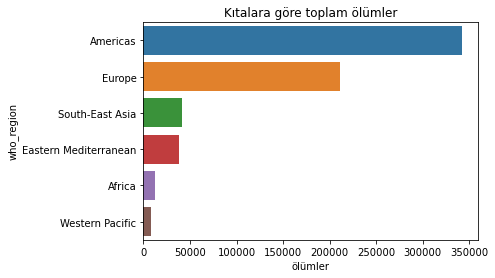

In [18]:
sns.barplot(y=df_reg["who_region"], x=df_reg["ölümler"])
plt.title("Kıtalara göre toplam ölümler")

In [17]:
cw.head(10)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [5]:
del cw['Country']

In [6]:
cw.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase', 'WHO Region'],
      dtype='object')

In [7]:
cw['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [21]:
cw.rename(columns={'New cases': 'New_cases', 'New deaths': 'New_deaths','New recovered':'New_recovered',
                  'Deaths / 100 Cases':'Deaths_100_Cases','Recovered / 100 Cases':'Recovered_100_Cases',
                  'Deaths / 100 Recovered':'Deaths_100_Recovered','Confirmed last week':'Confirmed_last_week',
                  '1 week change':'one_week_change','1 week % increase':'one_week_increase'
                  }, inplace=True)

In [22]:
cw.isnull().sum()


Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New_cases               0
New_deaths              0
New_recovered           0
Deaths_100_Cases        0
Recovered_100_Cases     0
Deaths_100_Recovered    0
Confirmed_last_week     0
one_week_change         0
one_week_increase       0
WHO Region              0
dtype: int64

In [23]:
cw.describe().round(3)

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_100_Cases,Recovered_100_Cases,Deaths_100_Recovered,Confirmed_last_week,one_week_change,one_week_increase
count,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.000,187.00,187.000,187.000,187.000
mean,88130.936,3497.519,50631.481,34001.936,1222.957,28.957,933.813,3.020,64.821,inf,78682.476,9448.460,13.606
std,383318.664,14100.002,190188.190,213326.173,5710.375,120.037,4197.720,3.454,26.288,NaN,338273.677,47491.128,24.510
min,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,10.000,-47.000,-3.840
25%,1114.000,18.500,626.500,141.500,4.000,0.000,0.000,0.945,48.770,1.45,1051.500,49.000,2.775
50%,5059.000,108.000,2815.000,1600.000,49.000,1.000,22.000,2.150,71.320,3.62,5020.000,432.000,6.890
75%,40460.500,734.000,22606.000,9149.000,419.500,6.000,221.000,3.875,86.885,6.44,37080.500,3172.000,16.855
max,4290259.000,148011.000,1846641.000,2816444.000,56336.000,1076.000,33728.000,28.560,100.000,inf,3834677.000,455582.000,226.320


In [8]:
cw=cw[~cw.isin([np.nan, np.inf, -np.inf]).any(1)]

In [9]:
cw.describe().round(3)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000,182.000
mean,89330.308,3509.879,52022.456,33797.973,1248.055,29.615,959.467,2.972,66.601,40.558,79666.857,9663.451,13.648
std,388432.327,14280.399,192608.410,216134.366,5786.513,121.615,4252.395,3.459,24.308,336.669,342779.477,48124.011,24.791
min,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,-47.000,-3.840
25%,1107.000,18.250,719.000,131.750,4.000,0.000,0.000,0.942,51.770,1.442,1045.250,47.000,2.762
50%,4970.000,103.500,3220.000,1599.000,49.000,1.000,24.000,2.130,72.270,3.580,4784.000,418.000,6.890
75%,39676.250,718.250,23333.500,8696.000,419.750,5.750,228.250,3.715,87.282,6.232,36583.500,3248.500,16.928
max,4290259.000,148011.000,1846641.000,2816444.000,56336.000,1076.000,33728.000,28.560,100.000,3259.260,3834677.000,455582.000,226.320


In [10]:
cw.round(2)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [11]:
a=cw.columns[0:13]
a

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

col_isimler =a
tahmin_isimler = ['WHO Region']

X = cw[col_isimler].values

y = cw[tahmin_isimler].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0) 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [29]:
prediction_from_trained_data = dt_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Karar ağaçları ile eğitim başarısı : {0:.4f}".format(accuracy))

Karar ağaçları ile eğitim başarısı : 1.0000


In [30]:
dt_predict_test = dt_model.predict(X_test)

print(classification_report(y_test, dt_predict_test))
print("Karar Ağaçlarının test verisi üzerinde'ki performansı %s" %
      accuracy_score(y_test, dt_predict_test))

                       precision    recall  f1-score   support

               Africa       0.42      0.42      0.42        12
             Americas       0.20      0.20      0.20         5
Eastern Mediterranean       0.33      0.40      0.36         5
               Europe       0.56      0.42      0.48        12
      South-East Asia       0.00      0.00      0.00         1
      Western Pacific       0.00      0.00      0.00         2

             accuracy                           0.35        37
            macro avg       0.25      0.24      0.24        37
         weighted avg       0.39      0.35      0.37        37

Karar Ağaçlarının test verisi üzerinde'ki performansı 0.35135135135135137


In [32]:
b=cw['WHO Region'].unique()

## Veri setimiz sınıflandırma için cok kucuk 

In [33]:
print ("Karar Ağaçları için Karışıklık matrisi ")


print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test,
                                             
                                             labels=b)))

print ("")

print ("Sınıflandırma Raporu\n")


print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=b)))

Karar Ağaçları için Karışıklık matrisi 
[[2 1 2 0 0 0]
 [1 5 3 2 0 1]
 [1 2 5 2 1 1]
 [2 0 0 1 1 1]
 [0 1 1 0 0 0]
 [0 0 1 0 0 0]]

Sınıflandırma Raporu

                       precision    recall  f1-score   support

Eastern Mediterranean       0.33      0.40      0.36         5
               Europe       0.56      0.42      0.48        12
               Africa       0.42      0.42      0.42        12
             Americas       0.20      0.20      0.20         5
      Western Pacific       0.00      0.00      0.00         2
      South-East Asia       0.00      0.00      0.00         1

             accuracy                           0.35        37
            macro avg       0.25      0.24      0.24        37
         weighted avg       0.39      0.35      0.37        37



^C
